# Data Loading

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Loading
data_url = "https://github.com/dsrscientist/Dataset2/raw/main/temperature.csv"
temperature_data = pd.read_csv(data_url)

In [19]:
# Display first few rows of the dataset
print("First few rows of the dataset:")
print(temperature_data.head())

First few rows of the dataset:
   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAP

# Data PreProcessing

In [20]:
# Step 2: Data Exploration

print(temperature_data.describe())

# Step 3: Data Preprocessing
# Handling missing values
temperature_data.dropna(inplace=True)  # For simplicity, dropping rows with missing values


           station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954        

# EDA

Data Summary:
           station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.

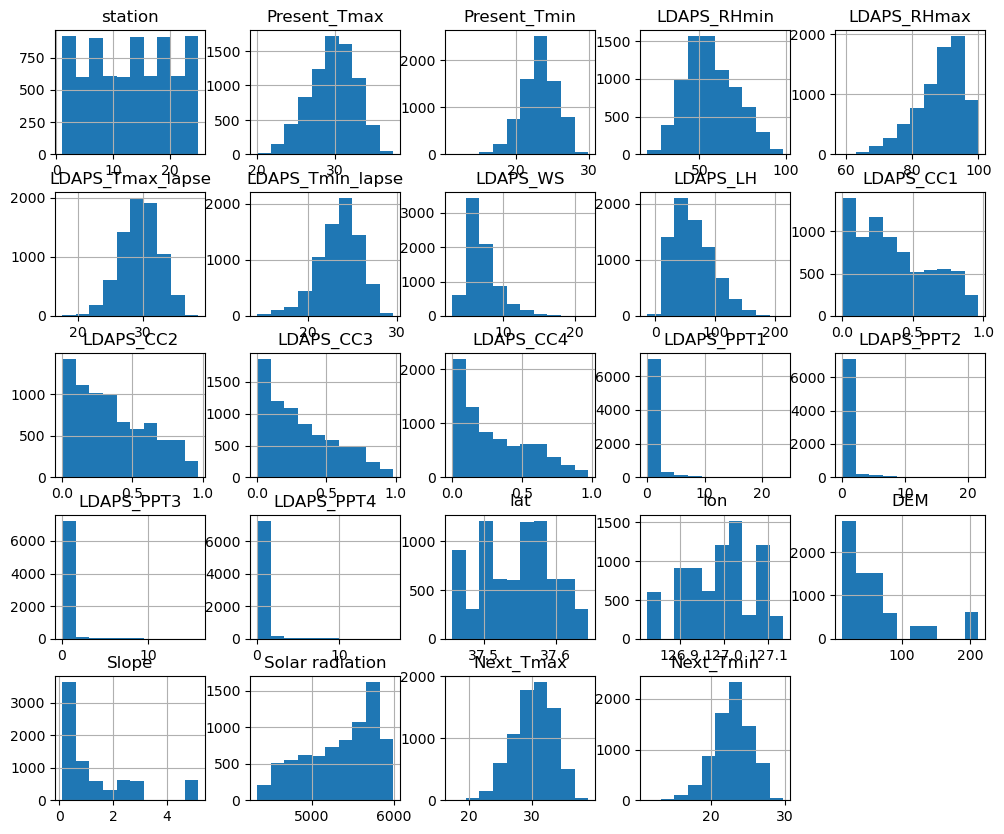

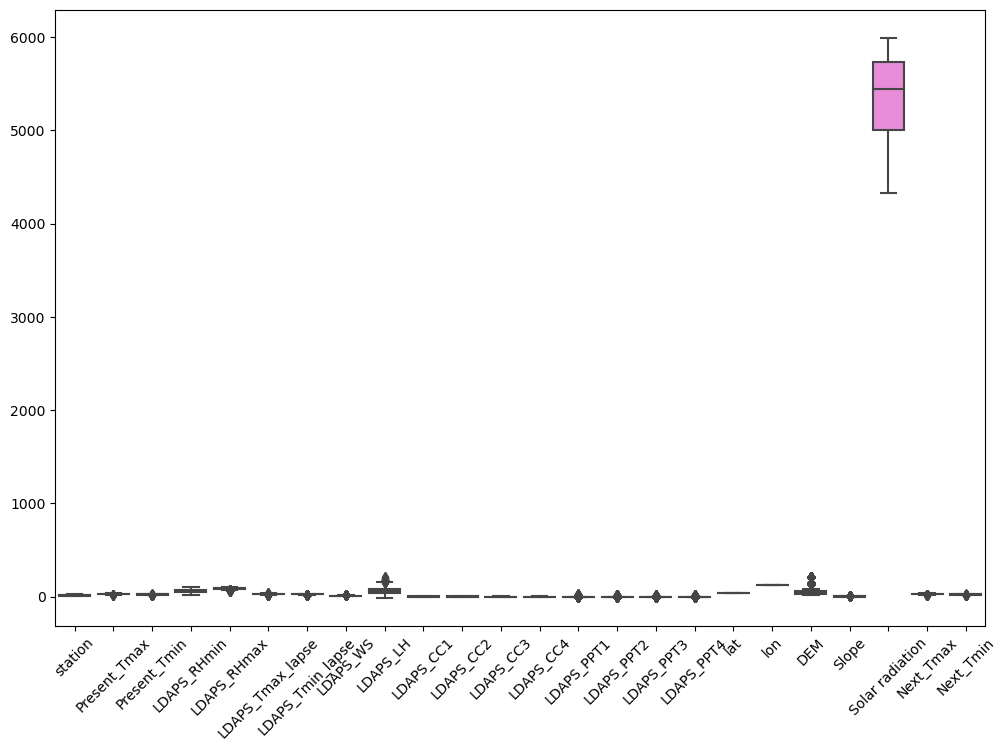

In [ ]:
# 1. Data Summary
print("Data Summary:")
print(temperature_data.describe())

# 2. Missing Values
print("\nMissing Values:")
print(temperature_data.isnull().sum())

# 3. Data Visualization
# Histograms
temperature_data.hist(figsize=(12, 10))
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=temperature_data)
plt.xticks(rotation=45)
plt.show()

# Scatter plots
plt.figure(figsize=(10, 6))
sns.pairplot(temperature_data)
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(temperature_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 4. Seasonal Trends
temperature_data['Date'] = pd.to_datetime(data['Date'])
temperature_data['Month'] = data['Date'].dt.month
monthly_means = temperature_data.groupby('Month')[['Next_Tmax', 'Next_Tmin']].mean()
plt.figure(figsize=(10, 6))
monthly_means.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Seasonal Trends in Temperature')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

# Data Splitting 

In [9]:
# Splitting data into features and target variables
X = temperature_data.drop(columns=['Next_Tmax', 'Next_Tmin', 'Date'])
y_next_tmax = temperature_data['Next_Tmax']
y_next_tmin = temperature_data['Next_Tmin']

# Step 3: Split the data into train and test sets
X_train, X_test, y_tmax_train, y_tmax_test = train_test_split(X, y_next_tmax, test_size=0.2, random_state=42)
X_train, X_test, y_tmin_train, y_tmin_test = train_test_split(X, y_next_tmin, test_size=0.2, random_state=42)



# Random Foresst Ressor Model

In [10]:
# Step 4: Model Selection
# Step 4: Initialize separate models for Next_Tmax and Next_Tmin
model_tmax = RandomForestRegressor(random_state=42)
model_tmin = RandomForestRegressor(random_state=42)


# Model Training

In [11]:
# Step 5: Model Training
model_tmax.fit(X_train, y_tmax_train)
model_tmin.fit(X_train, y_tmin_train)

RandomForestRegressor(random_state=42)

# Making Predictions

In [12]:
# Step 6: Make predictions
y_tmax_pred = model_tmax.predict(X_test)
y_tmin_pred = model_tmin.predict(X_test)


# Model Evaluation

In [13]:
# Step 7: Evaluate the models
mae_tmax = mean_absolute_error(y_tmax_test, y_tmax_pred)
mae_tmin = mean_absolute_error(y_tmin_test, y_tmin_pred)

mse_tmax = mean_squared_error(y_tmax_test, y_tmax_pred)
mse_tmin = mean_squared_error(y_tmin_test, y_tmin_pred)

print("Mean Absolute Error for Next_Tmax:", mae_tmax)
print("Mean Absolute Error for Next_Tmin:", mae_tmin)
print("Mean Squared Error for Next_Tmax:", mse_tmax)
print("Mean Squared Error for Next_Tmin:", mse_tmin)

Mean Absolute Error for Next_Tmax: 0.7427957839262186
Mean Absolute Error for Next_Tmin: 0.5951001317523055
Mean Squared Error for Next_Tmax: 1.0092711080368897
Mean Squared Error for Next_Tmin: 0.6226406469038207


# Predictions

In [14]:
# Print actual and predicted values for Next_Tmax
print("Actual Next_Tmax   Predicted Next_Tmax")
for actual, predicted in zip(y_tmax_test[:10], y_tmax_pred[:10]):
    print("{:<18} {:<18}".format(round(actual, 2), round(predicted, 2)))

# Print actual and predicted values for Next_Tmin
print("\nActual Next_Tmin   Predicted Next_Tmin")
for actual, predicted in zip(y_tmin_test[:10], y_tmin_pred[:10]):
    print("{:<18} {:<18}".format(round(actual, 2), round(predicted, 2)))


Actual Next_Tmax   Predicted Next_Tmax
28.7               28.95             
27.8               26.13             
33.6               33.66             
25.5               26.91             
29.4               28.89             
34.0               32.88             
21.1               21.21             
29.7               29.58             
24.4               25.15             
24.9               25.62             

Actual Next_Tmin   Predicted Next_Tmin
24.5               24.79             
21.5               22.27             
24.7               23.95             
22.5               22.58             
23.3               22.96             
20.3               20.85             
16.8               16.86             
20.0               20.74             
21.4               19.62             
22.1               22.34             


# Visulaising Predictions

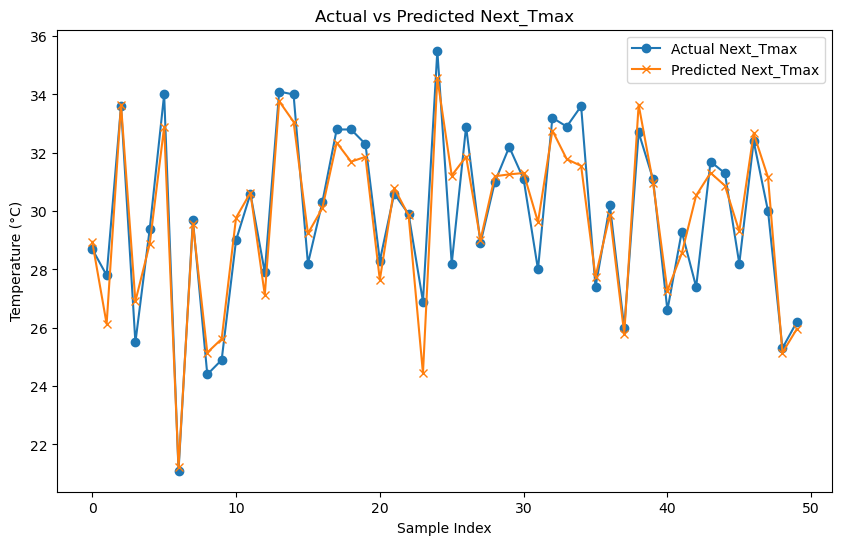

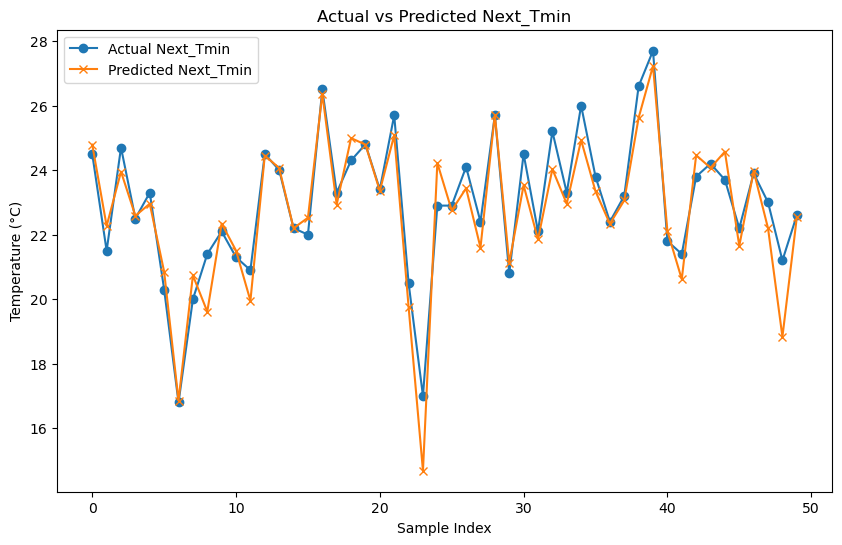

In [15]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot actual and predicted values for Next_Tmax
plt.plot(range(len(y_tmax_test[:50])), y_tmax_test[:50], label='Actual Next_Tmax', marker='o')
plt.plot(range(len(y_tmax_pred[:50])), y_tmax_pred[:50], label='Predicted Next_Tmax', marker='x')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Next_Tmax')

# Add legend
plt.legend()

# Show plot
plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot actual and predicted values for Next_Tmin
plt.plot(range(len(y_tmin_test[:50])), y_tmin_test[:50], label='Actual Next_Tmin', marker='o')
plt.plot(range(len(y_tmin_pred[:50])), y_tmin_pred[:50], label='Predicted Next_Tmin', marker='x')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Next_Tmin')

# Add legend
plt.legend()

# Show plot
plt.show()


For Actual Next_Tmax and Predicted Next_Tmax:

- In the first sample, the actual maximum temperature for the next day is 28.7°C, and the predicted value is 28.95°C. This suggests a slight increase in temperature for the next day compared to the actual value.
- Conversely, in the second sample, the actual maximum temperature is 27.8°C, while the predicted value is 26.13°C. Here, we observe a decrease in the predicted temperature for the next day compared to the actual temperature.
- Moving on to the third sample, the actual maximum temperature is 33.6°C, and the predicted value is 33.66°C. This indicates a negligible rise in temperature for the next day.
- The subsequent samples can be similarly analyzed to discern whether the predicted maximum temperatures for the next day are higher or lower than the actual values, indicating a rise or drop in temperature accordingly.

For Actual Next_Tmin and Predicted Next_Tmin:

- In the first sample, the actual minimum temperature for the next day is 24.5°C, while the predicted value is 24.79°C. This suggests a slight increase in temperature overnight.
- On the other hand, in the second sample, the actual minimum temperature is 21.5°C, and the predicted value is 22.27°C. Here, we observe a predicted rise in temperature for the next day compared to the actual value.
- Analyzing further, in the third sample, the actual minimum temperature is 24.7°C, and the predicted value is 23.95°C. This indicates a predicted drop in temperature for the next day.
- Similarly, the remaining samples can be interpreted to identify whether the predicted minimum temperatures for the next day are higher or lower than the actual values, signifying a rise or drop in temperature overnight.

In summary, incorporating the rise or drop in temperature into the explanation provides a more comprehensive understanding of the predicted values compared to the actual observations, aiding in the assessment of the model's performance in temperature forecasting.